### **Project Methodology**

For the purpose of this assignment, our central objective is to conduct a thorough examination of response time variations associated with diverse tokenization and detokenization techniques implemented across various language models. Our approach is multifaceted, encompassing comparisons of tokenization techniques, the utilization of both batched and unbatched data, and evaluations across distinct corpora. Additionally, we broaden our scope beyond the Hugging Face libraries by incorporating an external library called Spacy into our research. It is important to recognize that tokenization holds an important part in natural language processing, enabling the efficient manipulation of textual data.

The initial phase of our project involves an extensive exploration of various tokenization types, such as Byte-Pair Encoding (BPE), WordPiece, and SentencePiece, coupled with a comprehensive understanding of the underlying necessity of tokenization. Subsequently, we narrow our focus to language models employing these distinct tokenization methods, all of which are readily accessible within the Hugging Face libraries. To ensure precision in recording response times, we utilized Python's time module to measure the execution durations of both tokenization and detokenization processes.

In addition, we introduced an external library, Spacy, into our research. This additional tool permits an exploration of alternative approaches to tokenization and detokenization, facilitating a side-by-side evaluation of Spacy's performance alongside the models we have chosen from the Hugging Face libraries.

Furthermore, we delve into the complexities of batched and unbatched data. Batched data refers to the grouping of text for simultaneous processing, while unbatched data is processed individually. We carefully explored the nuances between these two data types, analyzing the time differentials for the tokenization and detokenization of each token.

To ensure meaningful experimentation and to account for potential variability, we ran our code for each model and technique a total of 10 times. This iterative approach allowed us to obtain consistent measurements and ensure the reliability of our results.

To ensure fairness and accuracy in our testing, we adhered to strict guidelines to ensure consistency. Each language model underwent an identical process, encompassing both batched and unbatched data, for both tokenization and detokenization. This approach guaranteed a consistent and precise measurement of processes and timings across all models.

In the analysis phase, we meticulously studied the timing data collected throughout our research to achieve a comprehensive understanding of response times linked to various tokenization and detokenization techniques. Our objective is to identify factors influencing processing times, determine the most efficient tokenization method, and ascertain whether batched or unbatched data processing yields better outcomes.

Furthermore, we employed data visualization techniques to effectively present our findings. Through the creation of informative charts and graphs, we were able to study and analyze disparities in response times between different tokenization methods and data processing approaches. These visual aids helped us in our research and revealed key insights.

The analysis we conducted aims to shed light on the nuances of response times in tokenization and detokenization, providing valuable insights for the field of natural language processing.

# `Project Dependencies`

In [1]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download zh_core_web_sm
!python -m spacy download es_core_news_sm
!pip install transformers
!pip install sentencepiece
!pip install datasets
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 57.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/fa/7c/8518799f3fc85e4c2538c0b4fc2306de90696f00c1a8286c943f9414292a/spacy-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for weasel<0.4.0,>=0.1.0 from https://files.pythonhosted.org/packages/de/f5/6786a5fd1ab6a38511f3772c9002f312a2d509c1237ae514631adf145ad4/weasel-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpathlib<0.16.0,>=0.7.0 from https://files.pythonhosted.org/packages/97/a2/e9a5bd762cccefc92a98c87354a65a8b75c280ab187a05e6d5851adbdae6/cloudpathlib-0.15.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling sp

# `Project Code`

Updated Project Code With detokenisation

In [2]:
from transformers import AutoTokenizer
from datasets import load_dataset
import time

# byte_pair_tokenization = ["openai-gpt", "gpt2", "NousResearch/Llama-2-13b-hf"]
# unigram_tokenization = ["google/bigbird-roberta-base", "facebook/mbart-large-50-many-to-many-mmt" , "albert-base-v2" , "xlnet-base-cased"]
# wordpiece_tokenization = ['distilbert-base-uncased','google/mobilebert-uncased','funnel-transformer/small-base','sentence-transformers/all-mpnet-base-v2']
# sentencepiece_tokenization = ["google/flan-t5-base"]

#corpus = ["I have a new GPU!", "I wonder how fast the model will train on this.","Hello there"]

dataset = load_dataset("HuggingFaceH4/self-instruct-seed")
corpus = dataset['train']['instruction']
dataset2 = load_dataset("fka/awesome-chatgpt-prompts")
corpus2 = dataset2['train']['prompt']

def initialize_model(model_name: str):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return tokenizer

#Unbatched data
def time_model(tokenizer_object, text, tokenize=True):
    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer_object.encode_plus(text)
    else:
        tokens = tokenizer_object.encode_plus(text)
        # Capture the start time
        start_time = time.time()
        tokenizer_object.decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_encode_plus(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Unbatched"

    for hugging_face_tokenizer in tokenizers:
        try:
            tokenizer = initialize_model(hugging_face_tokenizer)
            total_time_tokenization = 0  # Total time for tokenization
            total_time_detokenization = 0  # Total time for detokenization

            for _ in range(num_runs):
                for text in corpus:
                    # Tokenize each line in the corpus individually
                    tokenization_time = time_model(tokenizer, text, tokenize=True)
                    total_time_tokenization += tokenization_time

                    # Detokenize the encoded text
                    detokenization_time = time_model(tokenizer, text, tokenize=False)
                    total_time_detokenization += detokenization_time

            # Calculate the average time for tokenization and detokenization
            avg_tokenization_time = total_time_tokenization / num_runs
            avg_detokenization_time = total_time_detokenization / num_runs

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": avg_tokenization_time,
                "Detokenization": avg_detokenization_time
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {avg_tokenization_time} ms")
            print(f"Average Detokenization Time: {avg_detokenization_time} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


def time_model_batch(tokenizer, corpus,tokenize=True):

    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_encode_plus(corpus)
    else:
        tokens = tokenizer.batch_encode_plus(corpus)
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_batch(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Batched"

    for hugging_face_tokenizer in tokenizers:
        tokenizer = initialize_model(hugging_face_tokenizer)
        try:
            tokenization_times = []
            detokenization_times = []

            for _ in range(num_runs):
                # Get time for tokenization
                tokenization_time = time_model_batch(tokenizer, corpus, tokenize=True)
                tokenization_times.append(tokenization_time)

                # Get time for detokenization
                detokenization_time = time_model_batch(tokenizer, corpus, tokenize=False)
                detokenization_times.append(detokenization_time)

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": sum(tokenization_times) / num_runs,
                "Detokenization": sum(detokenization_times) / num_runs
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {sum(tokenization_times) / num_runs} ms")
            print(f"Average Detokenization Time: {sum(detokenization_times) / num_runs} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

## Openai , Gpt2 , Llama Analysis for Unbatched and Batched data

In [3]:
byte_pair = ["openai-gpt", "gpt2", "NousResearch/Llama-2-13b-hf"]
print("--------------------------Unbatched Data-------------------------------")
byte_pair_timing_unbatched = analyse_encode_plus(byte_pair, corpus,10)
print("--------------------------Batched Data-------------------------------")
byte_pair_timing_batched = analyse_batch(byte_pair,corpus,10)

--------------------------Unbatched Data-------------------------------


openai-gpt:
Average Tokenization Time: 64.59822654724121 ms
Average Detokenization Time: 1306.7325830459595 ms


gpt2:
Average Tokenization Time: 43.50428581237793 ms
Average Detokenization Time: 61.037302017211914 ms


NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 14.987850189208984 ms
Average Detokenization Time: 28.032946586608887 ms
--------------------------Batched Data-------------------------------
openai-gpt:
Average Tokenization Time: 11.788034439086914 ms
Average Detokenization Time: 26.524782180786133 ms
gpt2:
Average Tokenization Time: 18.2891845703125 ms
Average Detokenization Time: 43.33786964416504 ms
NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 12.381339073181152 ms
Average Detokenization Time: 48.55194091796875 ms


## Distilbert-base-uncased , mobilebert-uncased , Funnel Transformers, Mpnet Analysis for Unbatched and Batched Data

In [4]:
# Get response time for word_piece models
word_piece =['distilbert-base-uncased','google/mobilebert-uncased','funnel-transformer/small-base','sentence-transformers/all-mpnet-base-v2']
print("--------------------------Unbatched Data-------------------------------")
word_piece_timing_unbatched = analyse_encode_plus(word_piece, corpus,10)
print("--------------------------Batched Data-------------------------------")
word_piece_timing_batched = analyse_batch(word_piece,corpus,10)

--------------------------Unbatched Data-------------------------------


distilbert-base-uncased:
Average Tokenization Time: 21.658754348754883 ms
Average Detokenization Time: 31.4422607421875 ms


google/mobilebert-uncased:
Average Tokenization Time: 23.17347526550293 ms
Average Detokenization Time: 31.58712387084961 ms


funnel-transformer/small-base:
Average Tokenization Time: 22.509431838989258 ms
Average Detokenization Time: 31.72755241394043 ms


sentence-transformers/all-mpnet-base-v2:
Average Tokenization Time: 22.911953926086426 ms
Average Detokenization Time: 32.11958408355713 ms
--------------------------Batched Data-------------------------------
distilbert-base-uncased:
Average Tokenization Time: 13.030266761779785 ms
Average Detokenization Time: 28.07018756866455 ms
google/mobilebert-uncased:
Average Tokenization Time: 12.174534797668457 ms
Average Detokenization Time: 29.087519645690918 ms
funnel-transformer/small-base:
Average Tokenization Time: 12.398481369018555 ms
Average Detokenization Time: 30.40778636932373 ms
sentence-transformers/all-mpnet-base-v2:
Average Tokenization Time: 18.83101463317871 ms
Average Detokenization Time: 52.193450927734375 ms


## T5 Unbatched and Batch data analysis

In [5]:
sentence_piece = ["google/flan-t5-base","google/bigbird-roberta-base","albert-base-v2" , "xlnet-base-cased"]
sentence_piece_timing_unbatched = analyse_encode_plus(sentence_piece, corpus,10)
sentence_piece_timing_batched = analyse_batch(sentence_piece,corpus,10)

google/flan-t5-base:
Average Tokenization Time: 29.844093322753906 ms
Average Detokenization Time: 41.51713848114014 ms


google/bigbird-roberta-base:
Average Tokenization Time: 19.283509254455566 ms
Average Detokenization Time: 26.744794845581055 ms


albert-base-v2:
Average Tokenization Time: 24.60348606109619 ms
Average Detokenization Time: 28.119874000549316 ms


xlnet-base-cased:
Average Tokenization Time: 23.46053123474121 ms
Average Detokenization Time: 27.520060539245605 ms
google/flan-t5-base:
Average Tokenization Time: 10.276341438293457 ms
Average Detokenization Time: 24.908089637756348 ms
google/bigbird-roberta-base:
Average Tokenization Time: 9.267807006835938 ms
Average Detokenization Time: 24.785208702087402 ms
albert-base-v2:
Average Tokenization Time: 24.160099029541016 ms
Average Detokenization Time: 50.501394271850586 ms
xlnet-base-cased:
Average Tokenization Time: 19.819045066833496 ms
Average Detokenization Time: 45.195555686950684 ms


## Graph Analysis for Byte-Pair Encoding , WordPiece ,Unigram and Sentence Piece Unbatched and Batched Data

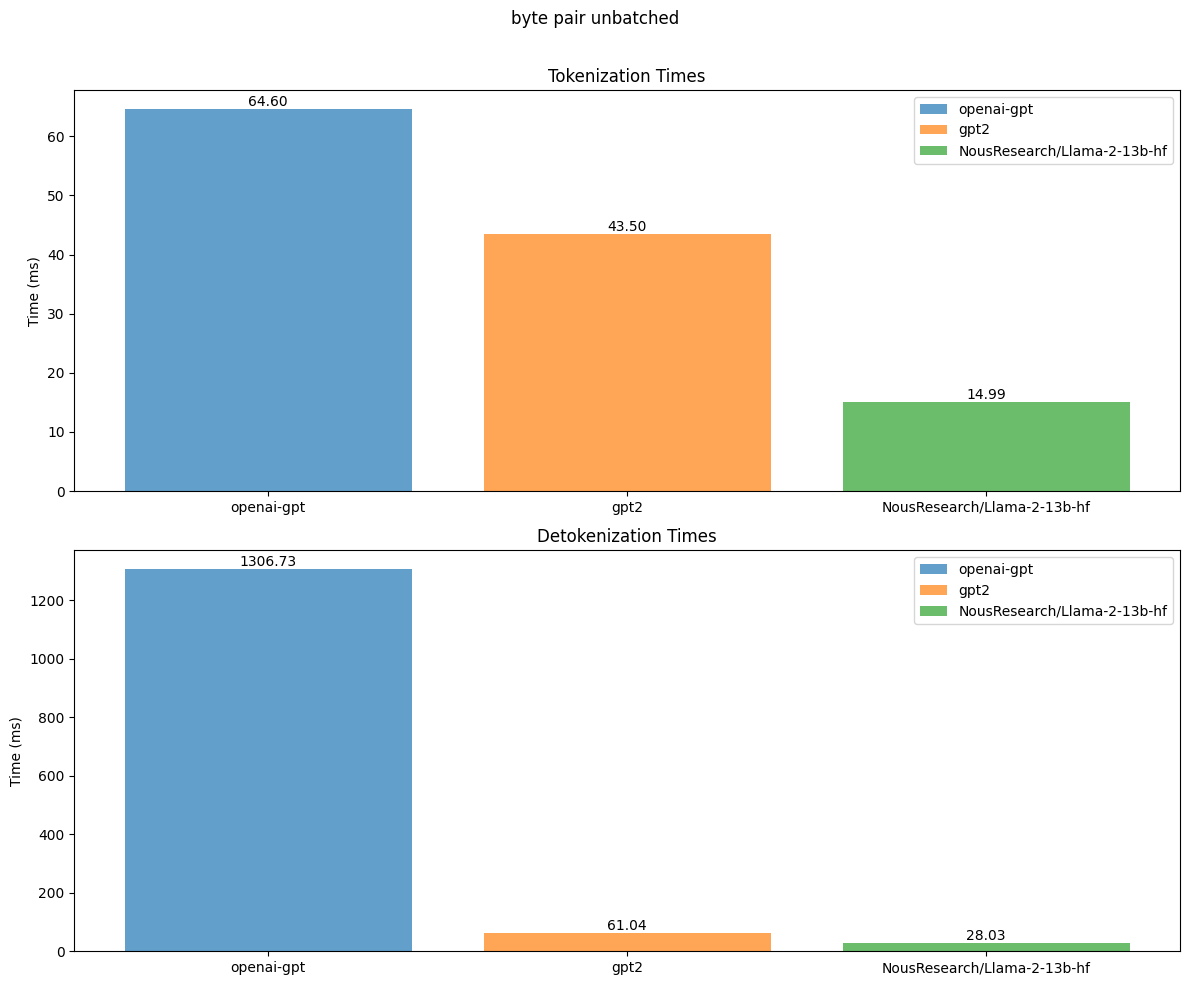

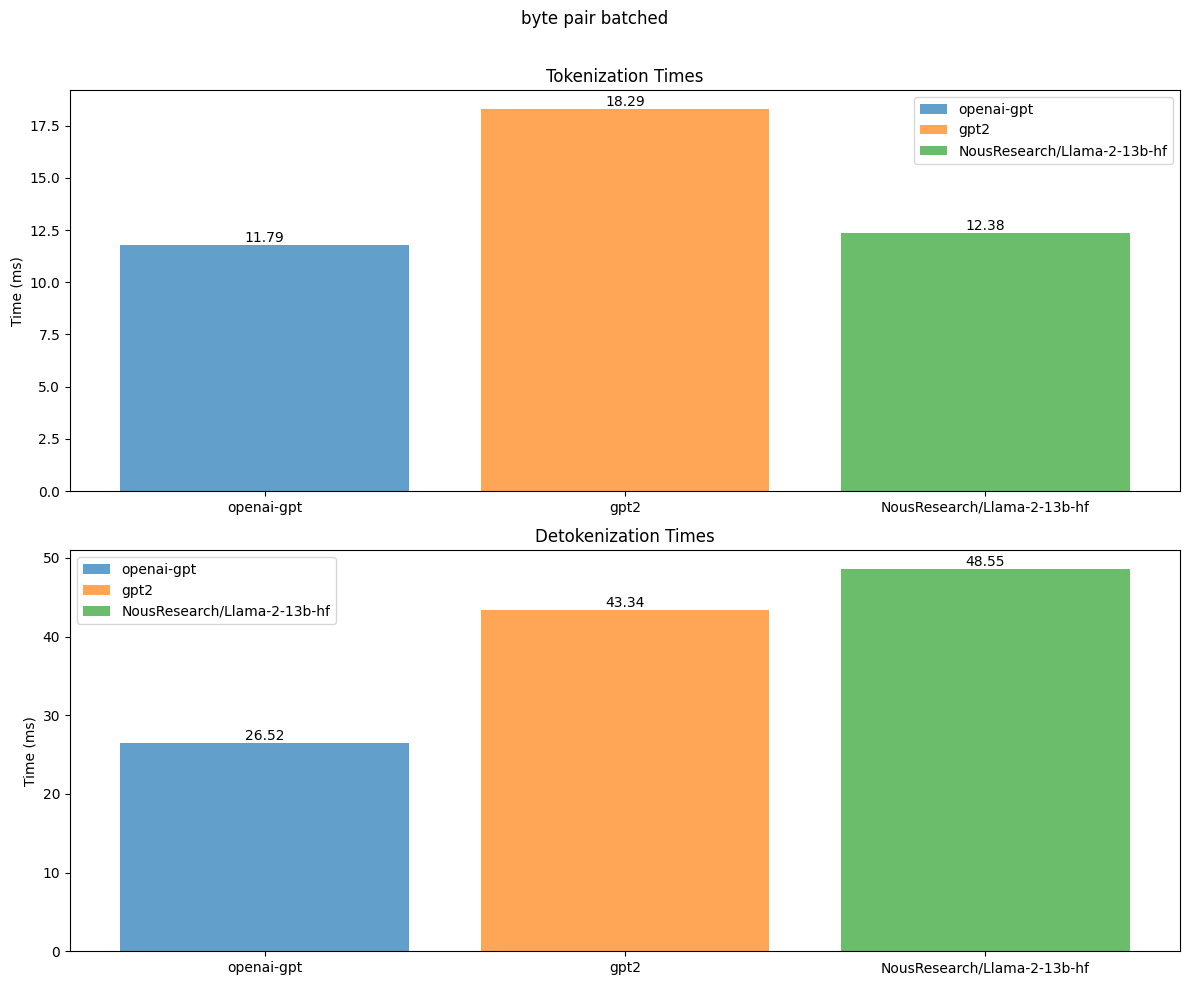

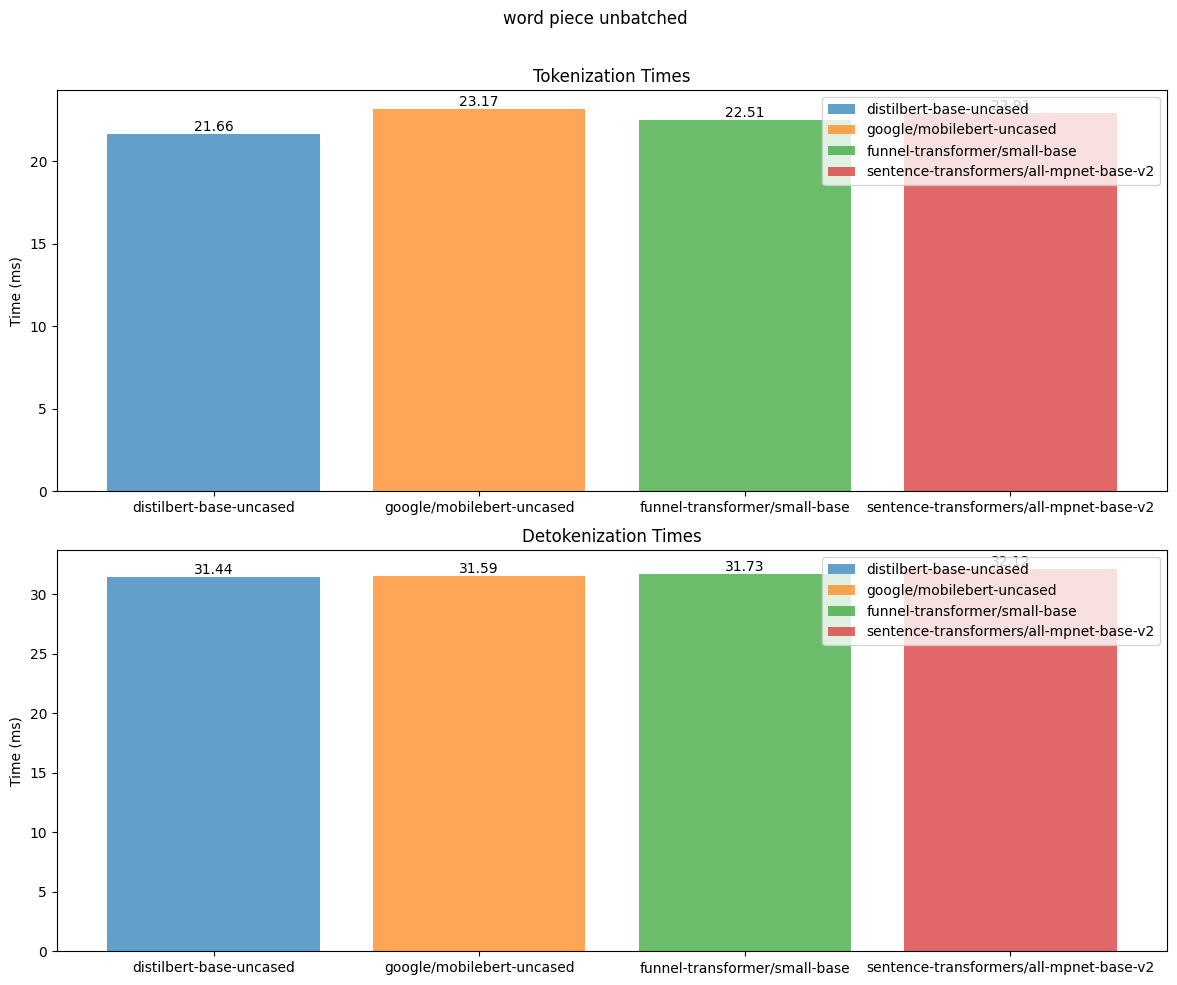

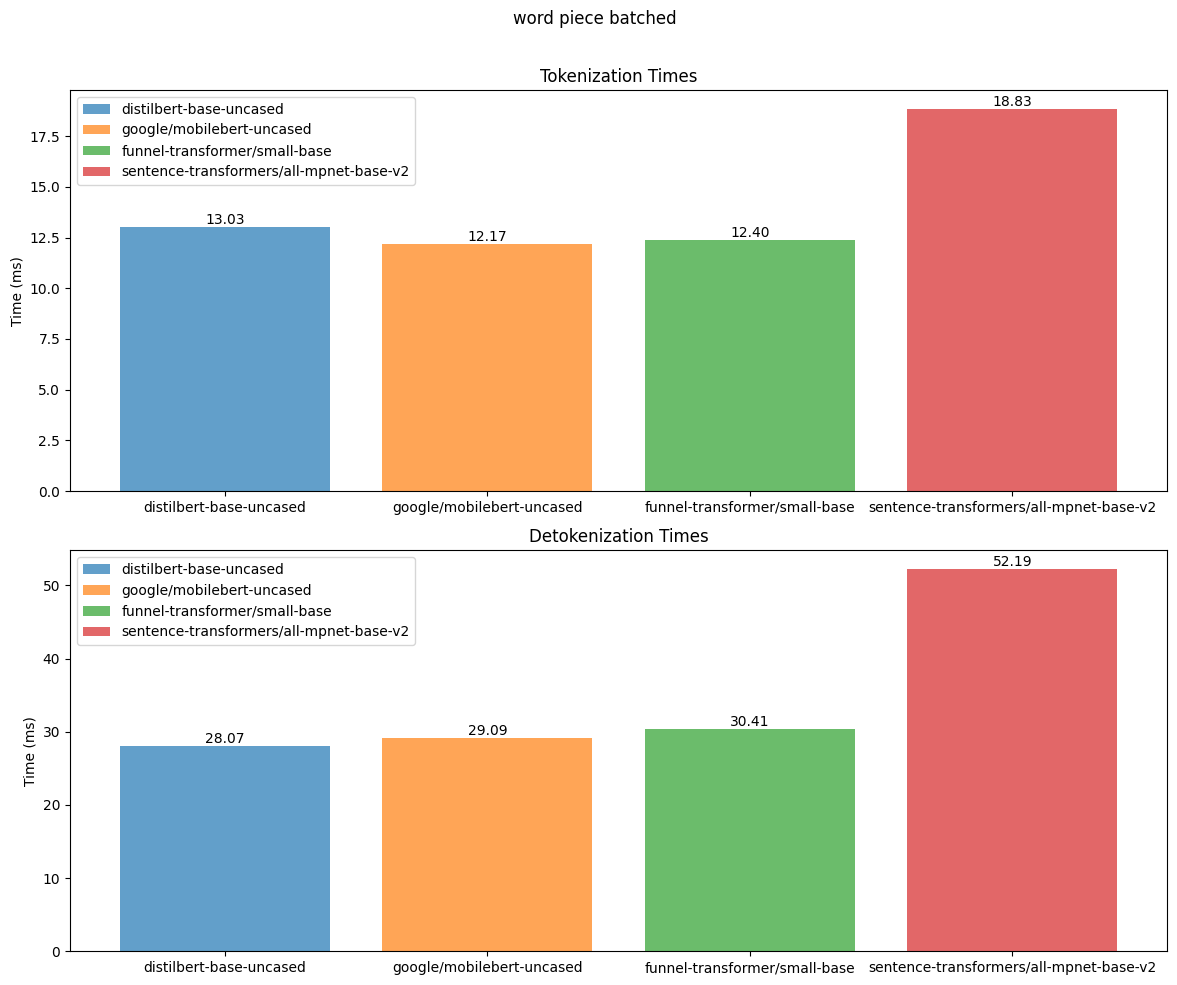

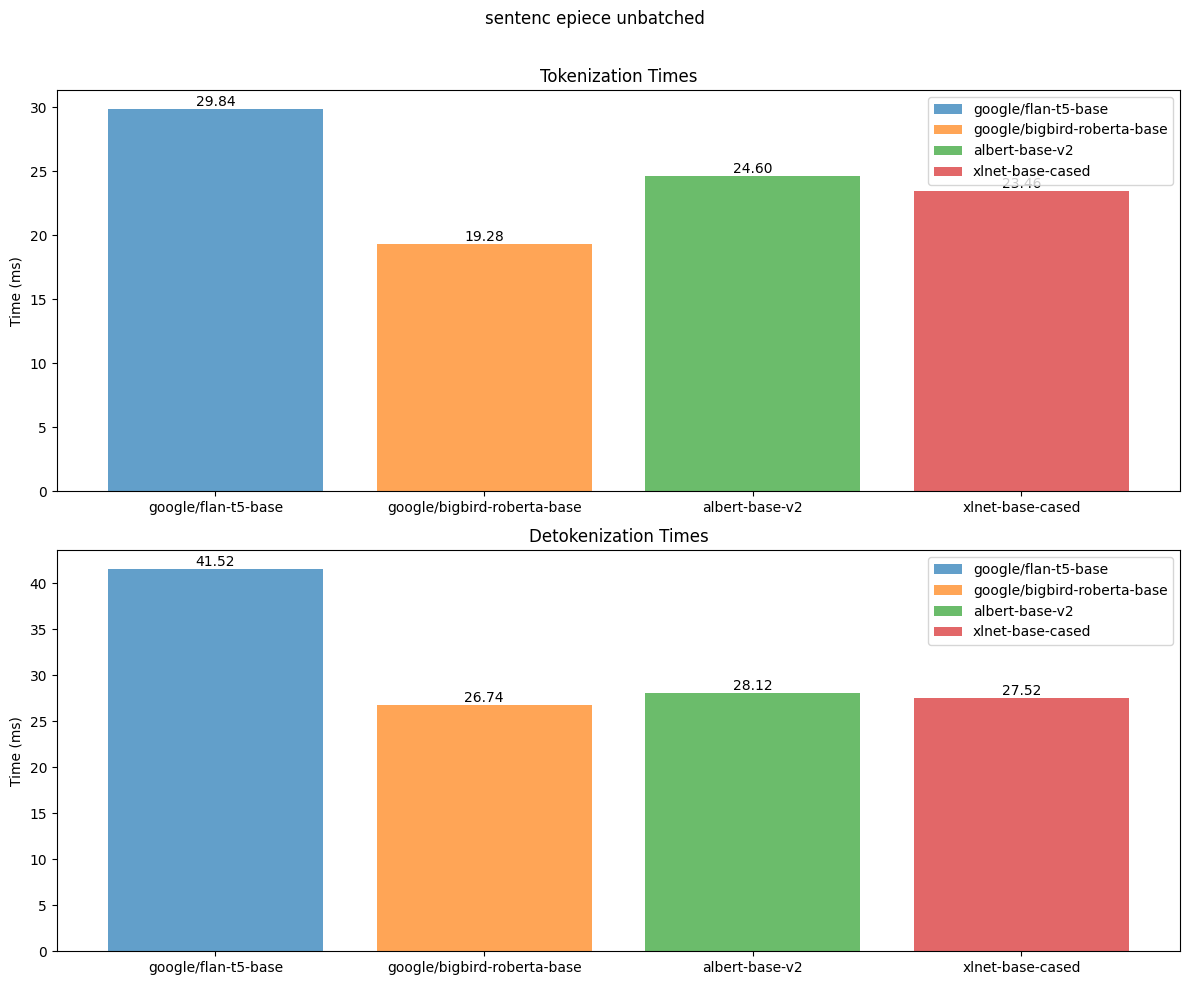

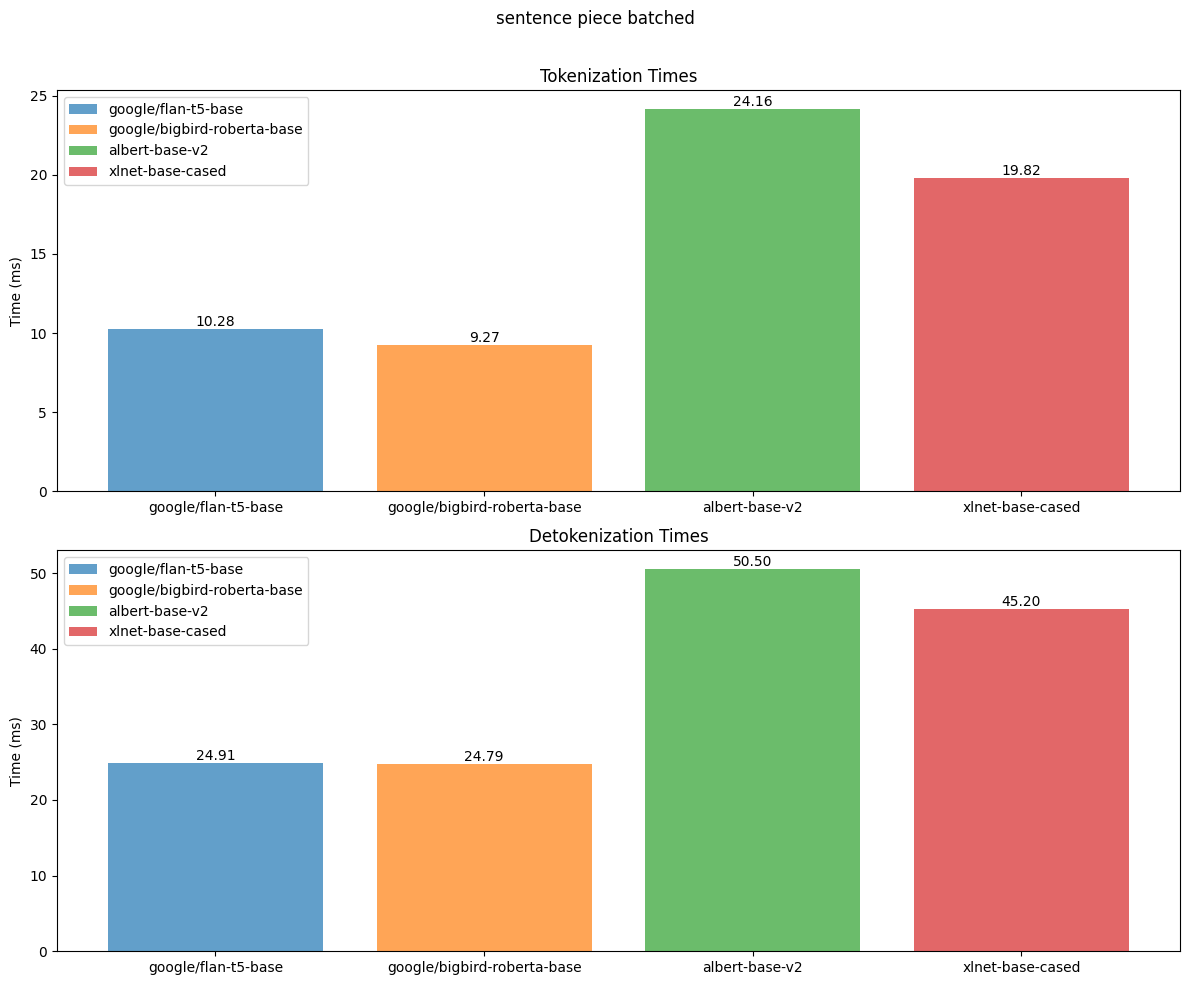

In [6]:
import matplotlib.pyplot as plt

def plot_dict(data_dict, title=''):
    # Extract method names and labels for the x-axis
    methods = list(data_dict.keys())
    x_labels = [f"{method}" for method in methods]

    # Create subplots for tokenization and detokenization times
    fig, axs = plt.subplots(2, figsize=(12, 10))
    fig.suptitle(title)

    for key, value in data_dict.items():
        if key == "method":
            continue

        # Plot tokenization times
        tokenization_time = value.get('Tokenization', 0.0)
        axs[0].bar(key, tokenization_time, label=key, alpha=0.7)

        # Plot detokenization times
        detokenization_time = value.get('Detokenization', 0.0)
        axs[1].bar(key, detokenization_time, label=key, alpha=0.7)

        # Add text labels on top of the bars
        axs[0].annotate(f'{tokenization_time:.2f}', (key, tokenization_time),
                            ha='center', va='bottom')
        axs[1].annotate(f'{detokenization_time:.2f}', (key, detokenization_time),
                            ha='center', va='bottom')

    # Set labels and titles
    axs[0].set_ylabel('Time (ms)')
    axs[0].set_title('Tokenization Times')
    axs[0].legend()

    axs[1].set_ylabel('Time (ms)')
    axs[1].set_title('Detokenization Times')
    axs[1].legend()

    # Show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    print("\n\n\n\n")
plot_dict(byte_pair_timing_unbatched, "byte pair unbatched")
plot_dict(byte_pair_timing_batched, "byte pair batched")
plot_dict(word_piece_timing_unbatched, "word piece unbatched")
plot_dict(word_piece_timing_batched, "word piece batched")
plot_dict(sentence_piece_timing_unbatched, "sentenc epiece unbatched")
plot_dict(sentence_piece_timing_batched, "sentence piece batched")


##Translation of corpus

In [7]:
from transformers import M2M100ForConditionalGeneration, AutoTokenizer

def translate(corpus,language):
    # Load the pre-trained model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained("facebook/m2m100_418M", src_lang="en")
    model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")

    # Initialize an empty list to store the translated sentences
    translated_corpus = []

    # Loop through each sentence in the input corpus
    for sentence in corpus:
        # Tokenize and encode the English sentence
        encoded_en = tokenizer(sentence, return_tensors="pt")

        # Generate the translation to Chinese
        generated_tokens = model.generate(**encoded_en, forced_bos_token_id=tokenizer.get_lang_id(language))

        # Decode the generated tokens back to text
        translated_sentence = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

        #Print translated_sentence
        print(translated_sentence)

        # Append the translated sentence to the result list
        translated_corpus.append(translated_sentence)

    return translated_corpus


In [12]:
chinese_corpus = translate(corpus2,"zh")
# Save the translations to a text file
with open("corpus_2_chinese.txt", "w", encoding="utf-8") as file:
    for translation in chinese_corpus:
        file.write(translation + "\n")

print("Translations saved to 'corpus_2_chinese.txt'.")

KeyboardInterrupt: ignored

##Other languages

In [26]:
def read_from_file(name):
  # Open the file for reading
  with open(name, 'r') as file:
      # Read all lines from the file and store them in a list
      lines = [line.strip() for line in file]
      return lines

!gdown 1PflB7C7BHccK47KKRUbRW1wR4OSMUxXO #downloading corpus_1_chinese.txt
!gdown 1cH4k1NSNnSImSJMqV7WUeINW-BIv8Sl_ #downloading corpus_1_espanol.txt
!gdown 1A4JOVzqk8houWPbMp6YbRm1dsSlYyLVM #downloading corpus_2_chinese.txt
!gdown 1z6sSljlNvOmvcYVK9lYg9OcyAvjkVvRp #downloading corpus_2_espanol.txt
zh1_array = read_from_file("corpus_1_chinese.txt")
zh2_array = read_from_file("corpus_2_chinese.txt")
es1_array = read_from_file("corpus_1_espanol.txt")
es2_array = read_from_file("corpus_2_espanol.txt")

chinese_models = ["bert-base-chinese", "bert-base-multilingual-cased", "OpenBuddy/openbuddy-llama2-70b-v10.1-bf16", "distilbert-base-multilingual-cased", "xlm-roberta-base"]
spanish_models = ["bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"]
english_models = ["bert-base-multilingual-cased", "OpenBuddy/openbuddy-llama2-70b-v10.1-bf16", "distilbert-base-multilingual-cased", "xlm-roberta-base","bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"]

Downloading...
From: https://drive.google.com/uc?id=1PflB7C7BHccK47KKRUbRW1wR4OSMUxXO
To: /content/corpus_1_chinese.txt
100% 11.3k/11.3k [00:00<00:00, 22.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cH4k1NSNnSImSJMqV7WUeINW-BIv8Sl_
To: /content/corpus_1_espanol.txt
100% 14.2k/14.2k [00:00<00:00, 30.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A4JOVzqk8houWPbMp6YbRm1dsSlYyLVM
To: /content/corpus_2_chinese.txt
100% 48.5k/48.5k [00:00<00:00, 60.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z6sSljlNvOmvcYVK9lYg9OcyAvjkVvRp
To: /content/corpus_2_espanol.txt
100% 74.6k/74.6k [00:00<00:00, 27.3MB/s]


## English Tokenization and Detokenization

In [27]:
print("--------------------------Unbatched English Corpus 1 Data-------------------------------")
english_corpus1_timing_unbatched = analyse_encode_plus(english_models, corpus, 10)
print("--------------------------Batched English Corpus 1 Data-------------------------------")
english_corpus1_timing_batched = analyse_batch(english_models,corpus, 10)
print("--------------------------Unbatched English Corpus 2 Data-------------------------------")
english_corpus2_timing_unbatched = analyse_encode_plus(english_models, corpus2,10)
print("--------------------------Batched English Corpus 2 Data-------------------------------")
english_corpus2_timing_batched = analyse_batch(english_models,corpus2,10)

--------------------------Unbatched English Corpus 1 Data-------------------------------
bert-base-multilingual-cased:
Average Tokenization Time: 21.06475830078125 ms
Average Detokenization Time: 34.324026107788086 ms
OpenBuddy/openbuddy-llama2-70b-v10.1-bf16:
Average Tokenization Time: 15.232491493225098 ms
Average Detokenization Time: 28.44376564025879 ms
distilbert-base-multilingual-cased:
Average Tokenization Time: 28.47726345062256 ms
Average Detokenization Time: 50.095462799072266 ms
xlm-roberta-base:
Average Tokenization Time: 37.63420581817627 ms
Average Detokenization Time: 52.81376838684082 ms
bert-base-multilingual-cased:
Average Tokenization Time: 37.84990310668945 ms
Average Detokenization Time: 60.10391712188721 ms
distilbert-base-multilingual-cased:
Average Tokenization Time: 28.96711826324463 ms
Average Detokenization Time: 46.715760231018066 ms
xlm-roberta-base:
Average Tokenization Time: 21.141815185546875 ms
Average Detokenization Time: 29.236507415771484 ms
--------

##Chinese Tokenization and Detokenization

In [13]:
print("--------------------------Unbatched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_unbatched = analyse_encode_plus(chinese_models, zh1_array, 10)
print("--------------------------Batched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_batched = analyse_batch(chinese_models,zh1_array, 10)
print("--------------------------Unbatched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_unbatched = analyse_encode_plus(chinese_models, zh2_array,10)
print("--------------------------Batched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_batched = analyse_batch(chinese_models,zh2_array,10)

--------------------------Unbatched Chinese Corpus 1 Data-------------------------------


bert-base-chinese:
Average Tokenization Time: 36.98773384094238 ms
Average Detokenization Time: 66.59367084503174 ms


bert-base-multilingual-cased:
Average Tokenization Time: 21.413087844848633 ms
Average Detokenization Time: 39.959049224853516 ms


OpenBuddy/openbuddy-llama2-70b-v10.1-bf16:
Average Tokenization Time: 12.741303443908691 ms
Average Detokenization Time: 33.397650718688965 ms


distilbert-base-multilingual-cased:
Average Tokenization Time: 21.173787117004395 ms
Average Detokenization Time: 40.06507396697998 ms


xlm-roberta-base:
Average Tokenization Time: 29.021716117858887 ms
Average Detokenization Time: 46.10390663146973 ms
--------------------------Batched Chinese Corpus 1 Data-------------------------------
bert-base-chinese:
Average Tokenization Time: 19.748854637145996 ms
Average Detokenization Time: 63.761186599731445 ms
bert-base-multilingual-cased:
Average Tokenization Time: 19.499611854553223 ms
Average Detokenization Time: 61.01045608520508 ms
OpenBuddy/openbuddy-llama2-70b-v10.1-bf16:
Average Tokenization Time: 5.631613731384277 ms
Average Detokenization Time: 33.02428722381592 ms
distilbert-base-multilingual-cased:
Average Tokenization Time: 11.372232437133789 ms
Average Detokenization Time: 36.325812339782715 ms
xlm-roberta-base:
Average Tokenization Time: 6.963658332824707 ms
Average Detokenization Time: 24.118423461914062 ms
--------------------------Unbatched Chinese Corpus 2 Data-------------------------------
bert-base-chinese:
Average Tokenization Time: 51.81889533996582 m

## Unbatched Chinese Corpus 1 Data Graph Analysis

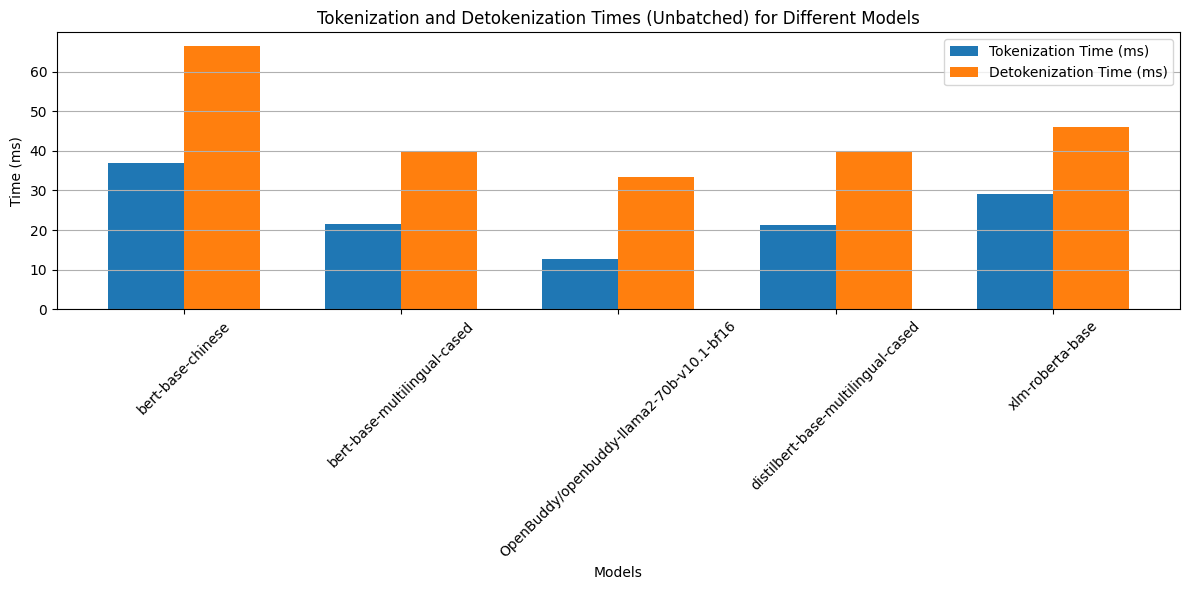

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Batched Chinese Corpus 1 Graph Analysis(Bar Chart)

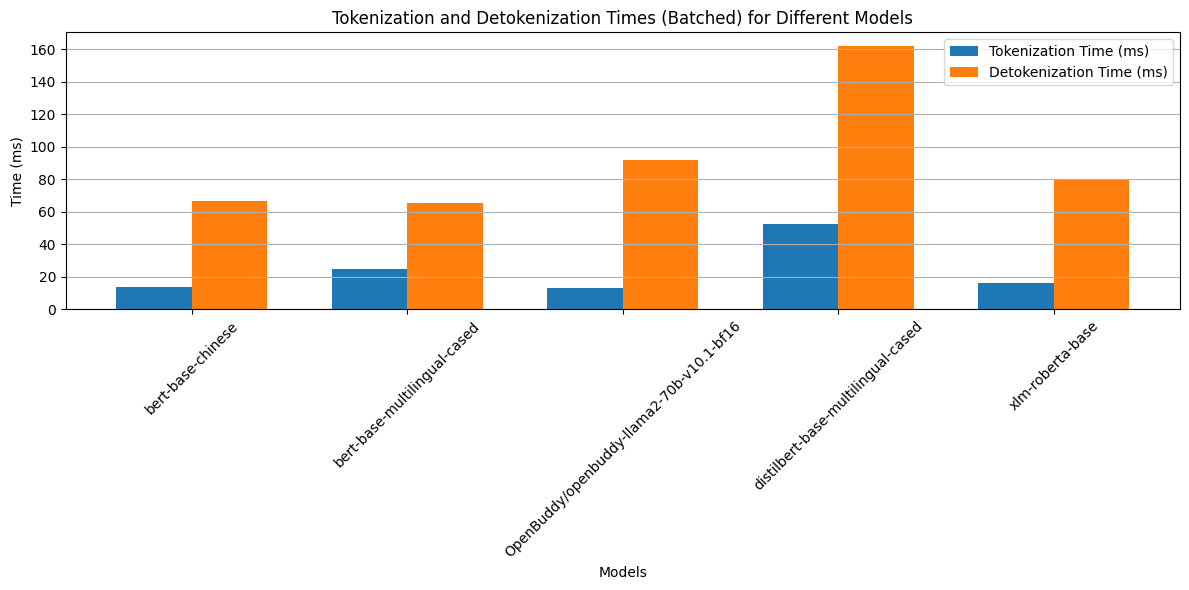

In [ ]:

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 batched

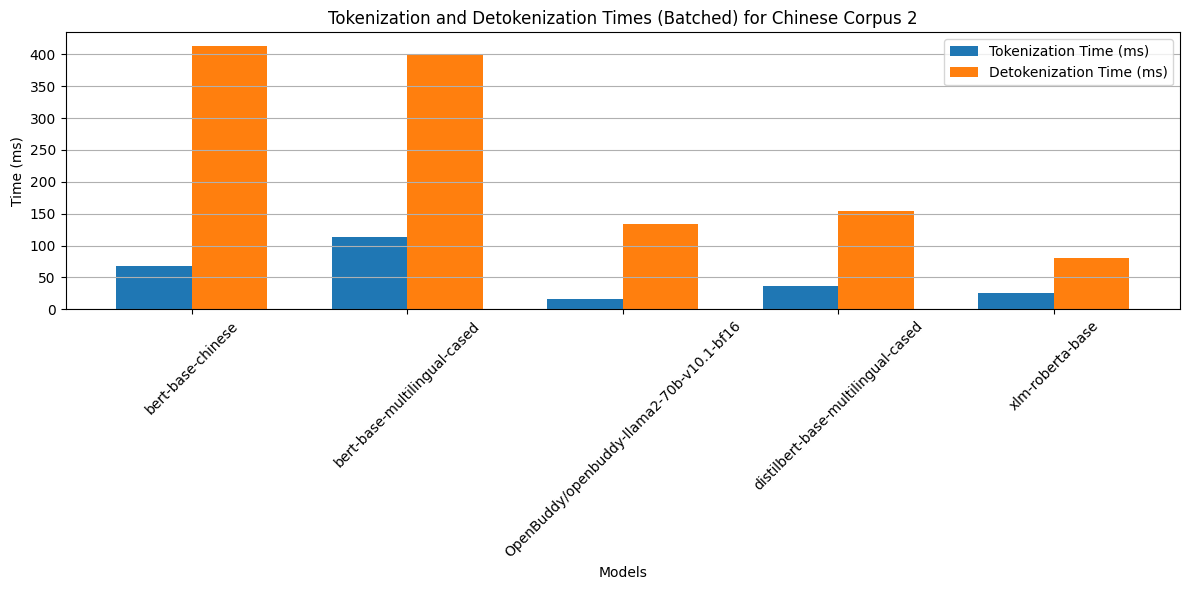

In [ ]:

# Data for chinese_corpus2_timing_batched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_batched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_batched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_batched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 Unbatched

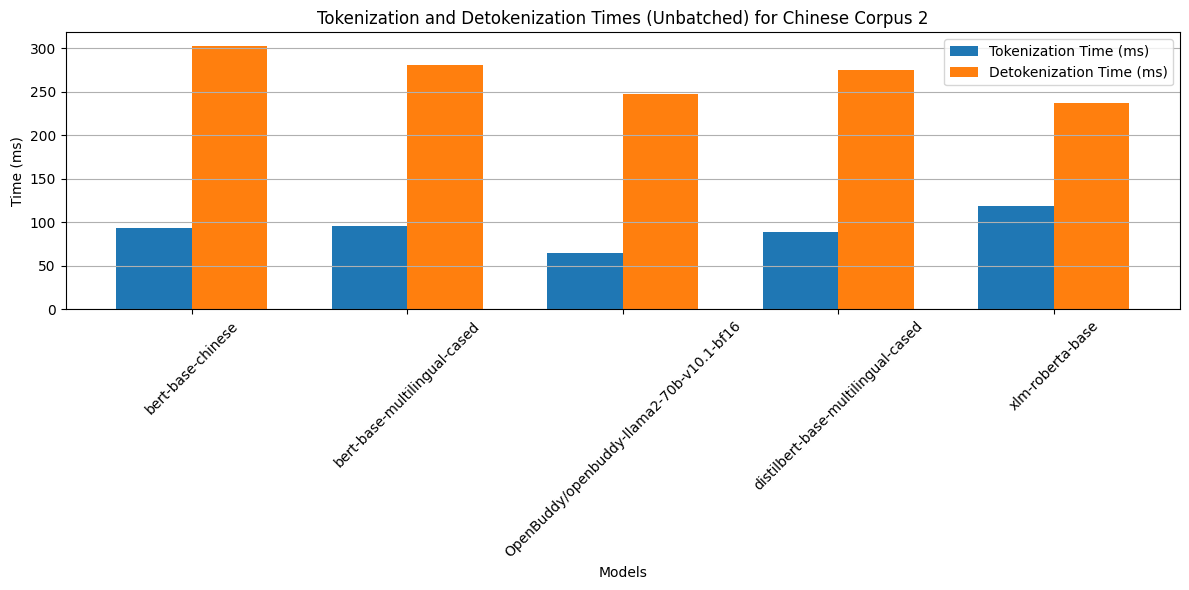

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish Tokenization and Detokenization

In [15]:
print("--------------------------Unbatched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_unbatched = analyse_encode_plus(spanish_models, es1_array , 10)
print(spanish_corpus1_timing_unbatched)
print("--------------------------Batched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_batched = analyse_batch(spanish_models,es1_array, 10)
print("--------------------------Unbatched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_unbatched = analyse_encode_plus(spanish_models, es2_array, 10)
print("--------------------------Batched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_batched = analyse_batch(spanish_models,es2_array, 10)

--------------------------Unbatched Spanish Corpus 1 Data-------------------------------
bert-base-multilingual-cased:
Average Tokenization Time: 22.805452346801758 ms
Average Detokenization Time: 38.16683292388916 ms
distilbert-base-multilingual-cased:
Average Tokenization Time: 25.389599800109863 ms
Average Detokenization Time: 42.70172119140625 ms
xlm-roberta-base:
Average Tokenization Time: 39.4317626953125 ms
Average Detokenization Time: 53.60407829284668 ms
{'method': 'Unbatched', 'bert-base-multilingual-cased': {'Tokenization': 22.805452346801758, 'Detokenization': 38.16683292388916}, 'distilbert-base-multilingual-cased': {'Tokenization': 25.389599800109863, 'Detokenization': 42.70172119140625}, 'xlm-roberta-base': {'Tokenization': 39.4317626953125, 'Detokenization': 53.60407829284668}}
--------------------------Batched Spanish Corpus 1 Data-------------------------------
bert-base-multilingual-cased:
Average Tokenization Time: 20.527243614196777 ms
Average Detokenization Time: 

##Spanish corpus 1 token and detoken graph analysis unbatched data

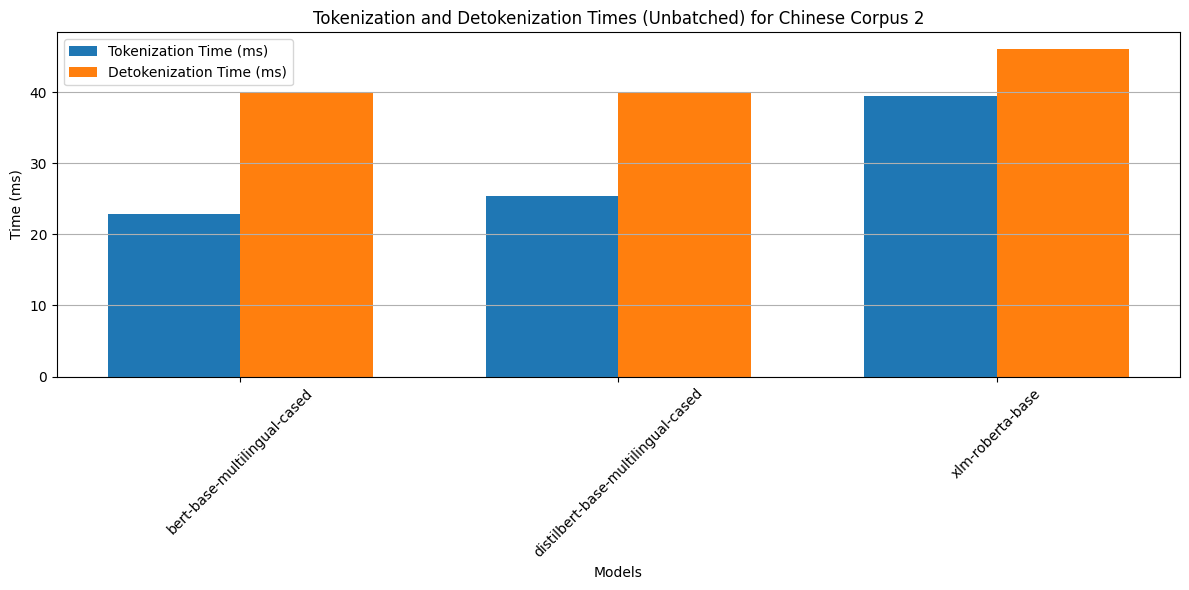

In [16]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 1 token and detoken graph Analysis batched data

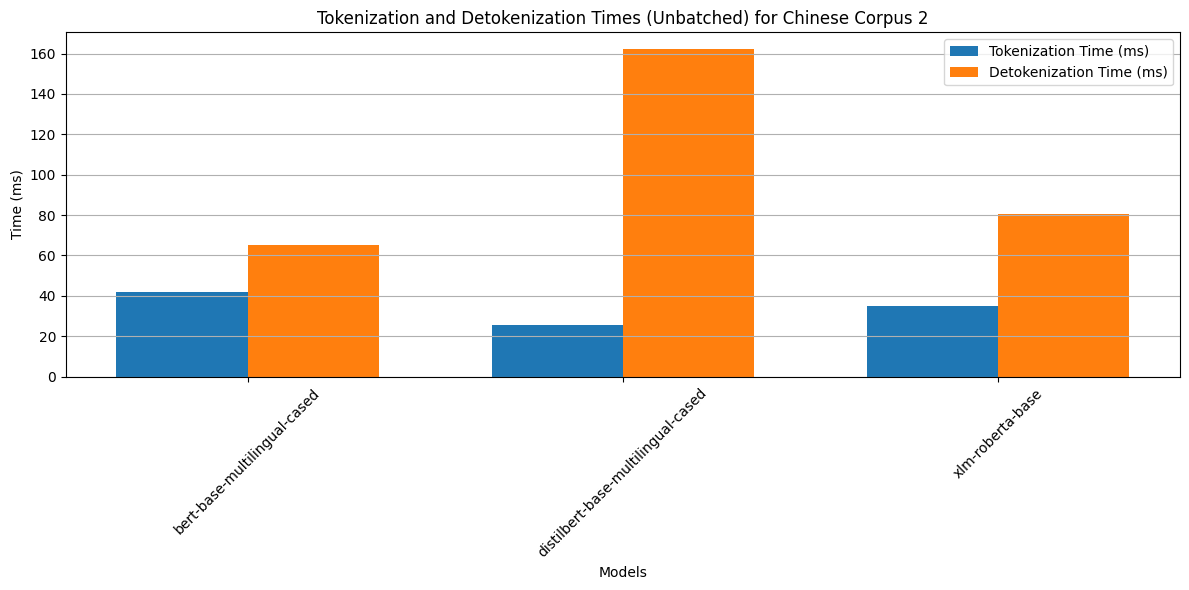

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis unbatched data

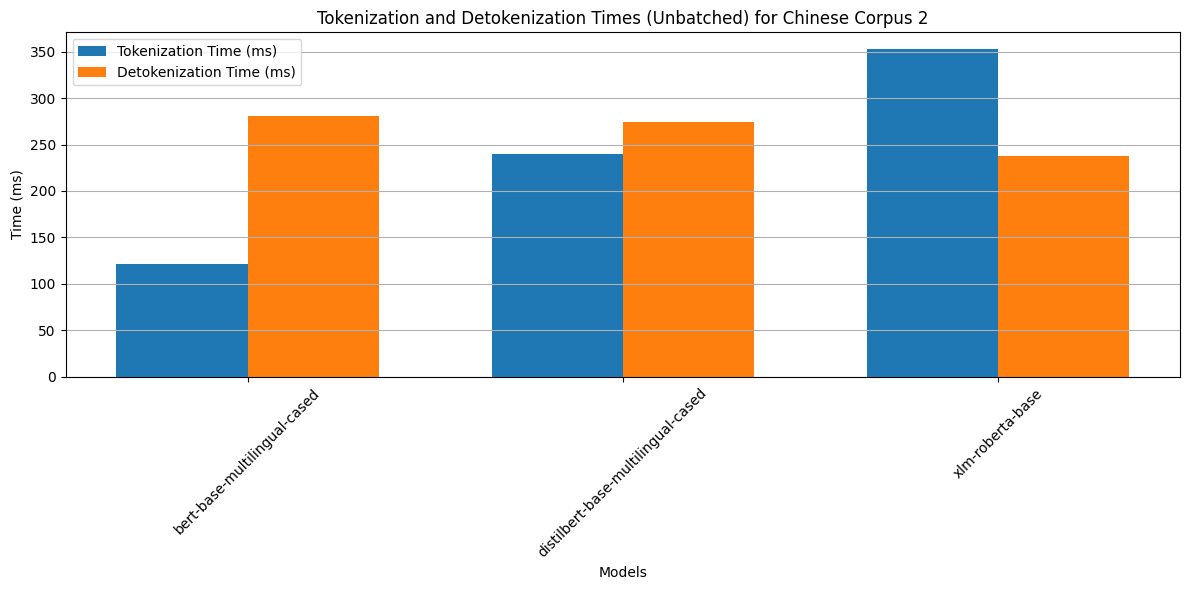

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis batched data

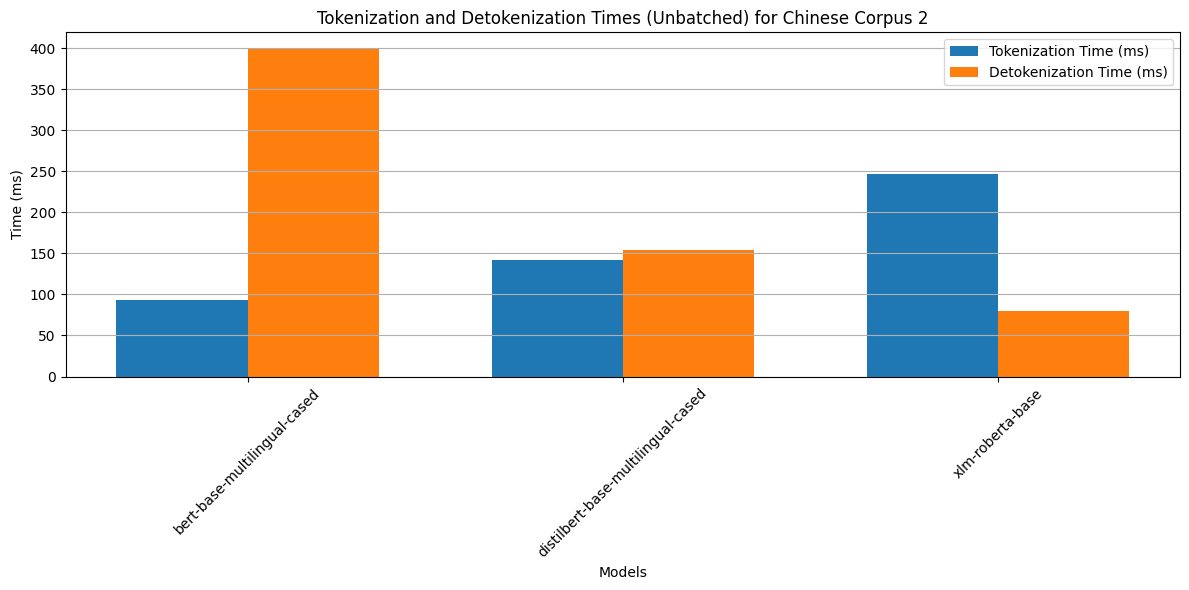

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


In [32]:
print(byte_pair_timing_unbatched)
print(byte_pair_timing_batched)
print(word_piece_timing_unbatched)
print(word_piece_timing_batched)
print(sentence_piece_timing_unbatched)
print(sentence_piece_timing_batched)
print(chinese_corpus2_timing_unbatched)
print(chinese_corpus2_timing_batched)
print(english_corpus1_timing_unbatched)
print(english_corpus1_timing_batched)
print(english_corpus2_timing_unbatched)
print(english_corpus2_timing_unbatched)
print(chinese_corpus2_timing_unbatched)
print(chinese_corpus2_timing_batched)
print(spanish_corpus1_timing_unbatched)
print(spanish_corpus1_timing_batched)
print(spanish_corpus2_timing_unbatched)
print(spanish_corpus2_timing_batched)

{'method': 'Unbatched', 'openai-gpt': {'Tokenization': 64.59822654724121, 'Detokenization': 1306.7325830459595}, 'gpt2': {'Tokenization': 43.50428581237793, 'Detokenization': 61.037302017211914}, 'NousResearch/Llama-2-13b-hf': {'Tokenization': 14.987850189208984, 'Detokenization': 28.032946586608887}}
{'method': 'Batched', 'openai-gpt': {'Tokenization': 11.788034439086914, 'Detokenization': 26.524782180786133}, 'gpt2': {'Tokenization': 18.2891845703125, 'Detokenization': 43.33786964416504}, 'NousResearch/Llama-2-13b-hf': {'Tokenization': 12.381339073181152, 'Detokenization': 48.55194091796875}}
{'method': 'Unbatched', 'distilbert-base-uncased': {'Tokenization': 21.658754348754883, 'Detokenization': 31.4422607421875}, 'google/mobilebert-uncased': {'Tokenization': 23.17347526550293, 'Detokenization': 31.58712387084961}, 'funnel-transformer/small-base': {'Tokenization': 22.509431838989258, 'Detokenization': 31.72755241394043}, 'sentence-transformers/all-mpnet-base-v2': {'Tokenization': 22

## Graph Analysis for language Models

<ipython-input-49-7dd0ec0dd757>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(methods, rotation=45)


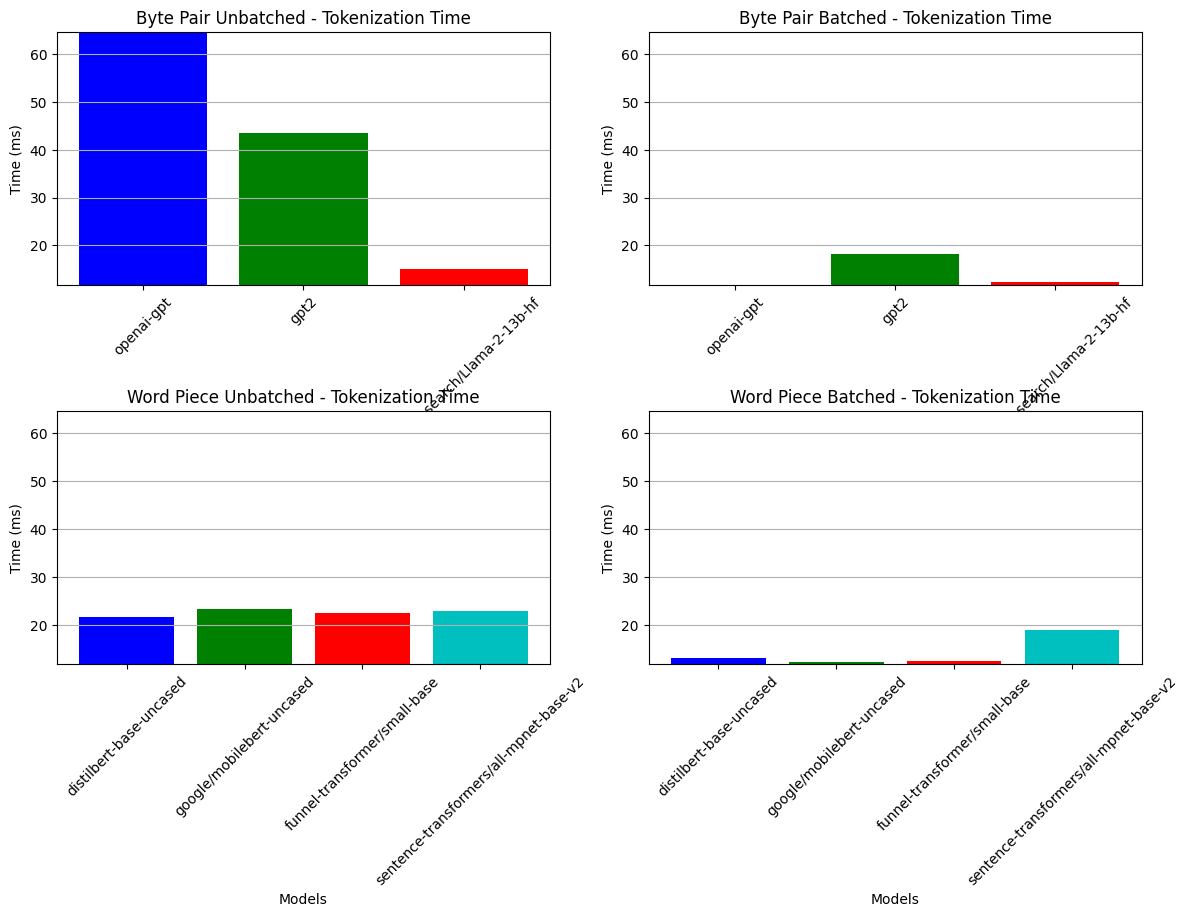

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for the bars (same as before)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#00FF00', '#800080', '#FF00FF', '#008080', '#FFFF00', '#808080', '#800000', '#FF0000']

# Define the data and labels (same as before)
data = [
    byte_pair_timing_unbatched,
    byte_pair_timing_batched,
    word_piece_timing_unbatched,
    word_piece_timing_batched,
]

labels = [
    'Byte Pair Unbatched',
    'Byte Pair Batched',
    'Word Piece Unbatched',
    'Word Piece Batched',
]

# Create subplots in a grid layout
n_rows = 2  # Number of rows (one for each pair of methods)
n_cols = 2  # Number of columns (Unbatched and Batched)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 8))  # Adjust the figure height and width

# Initialize variables to store min and max values for y-axis scaling
min_value = float('inf')
max_value = float('-inf')

# Iterate through data and labels, creating subplots
for i, (label, d) in enumerate(zip(labels, data)):
    row = i // n_cols  # Calculate the row index
    col = i % n_cols   # Calculate the column index

    methods = []
    tokenization_times = []

    for method, times in d.items():
        if method == 'method':
            continue
        methods.append(method)
        tokenization_time = times.get('Tokenization', 0.0)
        tokenization_times.append(tokenization_time)

    ax = axs[row, col]
    ax.bar(methods, tokenization_times, color=colors)
    ax.set_title(f"{label} - Tokenization Time")
    ax.set_xlabel('Models')
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(methods, rotation=45)
    ax.grid(axis='y')

    # Update min and max values for y-axis scaling
    min_value = min(min_value, min(tokenization_times))
    max_value = max(max_value, max(tokenization_times))

# Set a common y-axis scale for all subplots
for ax in axs.flatten():
    ax.set_ylim(min_value, max_value)

# Adjust spacing between subplots and add padding at the top
plt.subplots_adjust(hspace=0.5, top=0.9)

# Show the plot
plt.show()


<ipython-input-45-c605f9aa20c5>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(methods, rotation=45)


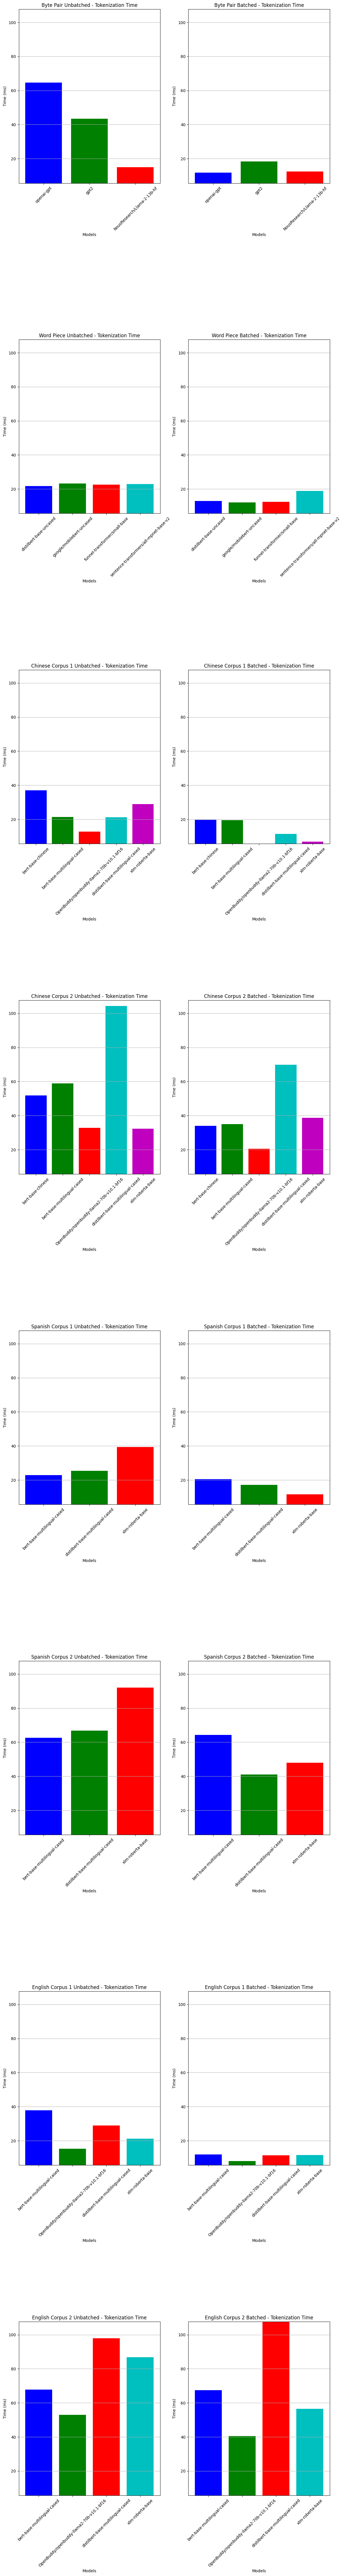

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for the bars (same as before)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#00FF00', '#800080', '#FF00FF', '#008080', '#FFFF00', '#808080', '#800000', '#FF0000']

# Define the data and labels (same as before)
data = [
    byte_pair_timing_unbatched,
    byte_pair_timing_batched,
    word_piece_timing_unbatched,
    word_piece_timing_batched,
    chinese_corpus1_timing_unbatched,
    chinese_corpus1_timing_batched,
    chinese_corpus2_timing_unbatched,
    chinese_corpus2_timing_batched,
    spanish_corpus1_timing_unbatched,
    spanish_corpus1_timing_batched,
    spanish_corpus2_timing_unbatched,
    spanish_corpus2_timing_batched,
    english_corpus1_timing_unbatched,  # Add English Unbatched data here
    english_corpus1_timing_batched,    # Add English Batched data here
    english_corpus2_timing_unbatched,  # Add English Unbatched data here
    english_corpus2_timing_batched     # Add English Batched data here
]

labels = [
    'Byte Pair Unbatched',
    'Byte Pair Batched',
    'Word Piece Unbatched',
    'Word Piece Batched',
    'Chinese Corpus 1 Unbatched',
    'Chinese Corpus 1 Batched',
    'Chinese Corpus 2 Unbatched',
    'Chinese Corpus 2 Batched',
    'Spanish Corpus 1 Unbatched',
    'Spanish Corpus 1 Batched',
    'Spanish Corpus 2 Unbatched',
    'Spanish Corpus 2 Batched',
    'English Corpus 1 Unbatched',  # Add English Unbatched label here
    'English Corpus 1 Batched',    # Add English Batched label here
    'English Corpus 2 Unbatched',  # Add English Unbatched label here
    'English Corpus 2 Batched'     # Add English Batched label here
]

# Create subplots in a grid layout
n_rows = 8  # Number of rows (one for each method)
n_cols = 2  # Number of columns (Unbatched and Batched)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 30))  # Increase the figure height for additional data

# Initialize variables to store min and max values for y-axis scaling
min_value = float('inf')
max_value = float('-inf')

# Iterate through data and labels, creating subplots
for i, (label, d) in enumerate(zip(labels, data)):
    row = i // n_cols  # Calculate the row index
    col = i % n_cols   # Calculate the column index

    methods = []
    tokenization_times = []

    for method, times in d.items():
        if method == 'method':
            continue
        methods.append(method)
        tokenization_time = times.get('Tokenization', 0.0)
        tokenization_times.append(tokenization_time)

    ax = axs[row, col]
    ax.bar(methods, tokenization_times, color=colors)
    ax.set_title(f"{label} - Tokenization Time")
    ax.set_xlabel('Models')
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(methods, rotation=45)
    ax.grid(axis='y')

    # Update min and max values for y-axis scaling
    min_value = min(min_value, min(tokenization_times))
    max_value = max(max_value, max(tokenization_times))

# Set a common y-axis scale for all subplots
for ax in axs.flatten():
    ax.set_ylim(min_value, max_value)

# Adjust spacing between subplots and add padding at the top
plt.subplots_adjust(hspace=0.9, top=3)  # Increase top padding for additional data

# Show the plot
plt.show()


# Spacy tokenization

In [18]:
import spacy
import time
import numpy as np

def spacy_unbatched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Unbatched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    for text in corpus:
        doc = nlp(text)

    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

def spacy_batched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Batched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    docs = list(nlp.pipe(corpus, batch_size=32))
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN1 = spacy_unbatched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", unbatched_tokenize_results_EN1["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN1 = spacy_batched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", batched_tokenize_time_EN1["SpaCy"], " ms")
print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN2 = spacy_unbatched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", unbatched_tokenize_results_EN2["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN2 = spacy_batched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", batched_tokenize_time_EN2["SpaCy"], " ms")

print("-----------UNBATCHED ZH 1 TOKENIZATION-----------")
unbatched_tokenize_results_ZH1 = spacy_unbatched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", unbatched_tokenize_results_ZH1["SpaCy"], " ms")
print("-----------BATCHED ZH 1 TOKENIZATION-----------")
batched_tokenize_time_ZH1 = spacy_batched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", batched_tokenize_time_ZH1["SpaCy"], " ms")
print("-----------UNBATCHED ZH 2 TOKENIZATION-----------")
unbatched_tokenize_results_ZH2 = spacy_unbatched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", unbatched_tokenize_results_ZH2["SpaCy"], " ms")
print("-----------BATCHED ZH 2 TOKENIZATION-----------")
batched_tokenize_time_ZH2 = spacy_batched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", batched_tokenize_time_ZH2["SpaCy"], " ms")

print("-----------UNBATCHED ES 1 TOKENIZATION-----------")
unbatched_tokenize_results_ES1 = spacy_unbatched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", unbatched_tokenize_results_ES1["SpaCy"], " ms")
print("-----------BATCHED ES 1 TOKENIZATION-----------")
batched_tokenize_time_ES1 = spacy_batched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES1["SpaCy"], " ms")
print("-----------UNBATCHED ES 2 TOKENIZATION-----------")
unbatched_tokenize_results_ES2 = spacy_unbatched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 2 ES Average:", unbatched_tokenize_results_ES2["SpaCy"], " ms")
print("-----------BATCHED ES 2 TOKENIZATION-----------")
batched_tokenize_time_ES2 = spacy_batched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES2["SpaCy"], " ms")

-----------UNBATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 2664.894485473633}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 682.2017192840576}  ms
-----------UNBATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 5565.911817550659}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 2589.4550561904907}  ms
-----------UNBATCHED ZH 1 TOKENIZATION-----------
Corpus 1 ZH Average: {'Tokenization Time ': 1922.095012664795}  ms
-----------BATCHED ZH 1 TOKENIZATION-----------
Corpus 1 ZH Average: {'Tokenization Time ': 784.9471569061279}  ms
-----------UNBATCHED ZH 2 TOKENIZATION-----------
Corpus 2 ZH Average: {'Tokenization Time ': 4932.182693481445}  ms
-----------BATCHED ZH 2 TOKENIZATION-----------
Corpus 2 ZH Average: {'Tokenization Time ': 2345.646643638611}  ms
-----------UNBATCHED ES 1 TOKENIZATION-----------
Corpus 1 ES Average: {'Tokenization Time 

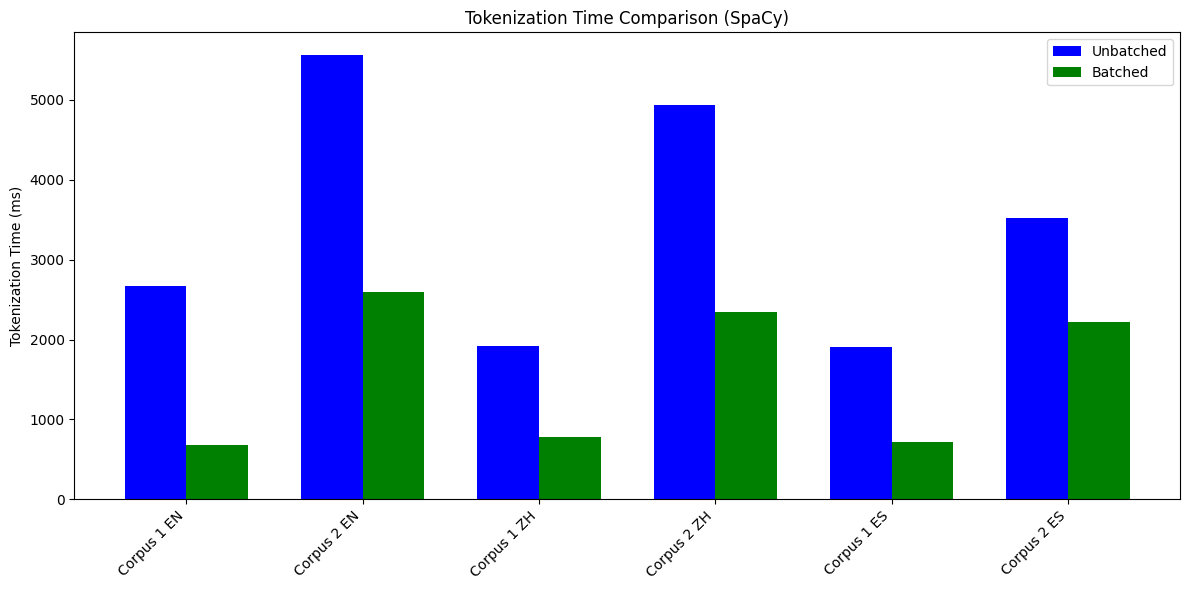

In [51]:
import matplotlib.pyplot as plt

# Data from your output
corpora = ['Corpus 1 EN', 'Corpus 2 EN', 'Corpus 1 ZH', 'Corpus 2 ZH', 'Corpus 1 ES', 'Corpus 2 ES']
unbatched_times = [
    unbatched_tokenize_results_EN1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_EN2["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ZH1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ZH2["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ES1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ES2["SpaCy"]["Tokenization Time "]
]
batched_times = [
    batched_tokenize_time_EN1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_EN2["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ZH1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ZH2["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ES1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ES2["SpaCy"]["Tokenization Time "]
]

# Bar positions
x = range(len(corpora))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
width = 0.35

# Plot the unbatched times
ax.bar([i - width/2 for i in x], unbatched_times, width, label='Unbatched', color='b')

# Plot the batched times
ax.bar([i + width/2 for i in x], batched_times, width, label='Batched', color='g')

# Set the x-axis labels to the corpora names
ax.set_xticks(x)
ax.set_xticklabels(corpora, rotation=45, fontsize=10, ha='right')

# Set the y-axis label
ax.set_ylabel('Tokenization Time (ms)')

# Set the title
ax.set_title('Tokenization Time Comparison (SpaCy)')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
